# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import sklearn

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities

['kandi',
 'amderma',
 'busselton',
 'brookhaven',
 'chumikan',
 'ponta do sol',
 'vila franca do campo',
 'oistins',
 'villanueva',
 'san patricio',
 'qaanaaq',
 'hilo',
 'barrow',
 'hobart',
 'srandakan',
 'nikolskoye',
 'berlevag',
 'ushuaia',
 'gudalur',
 'rikitea',
 'mataura',
 'yellowknife',
 'punta arenas',
 'vaini',
 'abu dhabi',
 'taolanaro',
 'margate',
 'albany',
 'nangomba',
 'tricase',
 'seoul',
 'ketchikan',
 'ranot',
 'esperance',
 'barentsburg',
 'banyo',
 'barcelos',
 'esmeraldas',
 'cape town',
 'sibolga',
 'longyearbyen',
 'palabuhanratu',
 'khatanga',
 'puerto ayora',
 'hobyo',
 'carnarvon',
 'raudeberg',
 'belushya guba',
 'dunedin',
 'naantali',
 'butaritari',
 'baykit',
 'todos santos',
 'poya',
 'bluff',
 'kapaa',
 'makakilo city',
 'grand river south east',
 'tiarei',
 'sentyabrskiy',
 'port alfred',
 'nemuro',
 'vao',
 'canutama',
 'tuljapur',
 'michurinsk',
 'saskylakh',
 'vila velha',
 'airai',
 'mpanda',
 'tura',
 'pisco',
 'arraial do cabo',
 'caico',
 'kl

In [6]:


# search base url
url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "&appid=" + weather_api_key + "&q=" + cities[100] + "&units={units}"




In [7]:
# get weather data
weather_response = requests.get(query_url )
weathers = weather_response.json()
pprint(weathers)

{'base': 'stations',
 'clouds': {'all': 19},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.0333},
 'dt': 1636425678,
 'id': 4020109,
 'main': {'feels_like': 299.27,
          'grnd_level': 1005,
          'humidity': 79,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 298.61,
          'temp_max': 298.61,
          'temp_min': 298.61},
 'name': 'Atuona',
 'rain': {'1h': 0.16},
 'sys': {'country': 'PF', 'sunrise': 1636382671, 'sunset': 1636427723},
 'timezone': -34200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 72, 'gust': 8.58, 'speed': 7.93}}


In [8]:
query_url = url + "&appid=" + weather_api_key + "&units={units}"+ "&q=" 
# response = requests.get(query_url + cities[1]).json()
# print(response)



In [9]:
# Print to logger
print("----------------------------")
print("Beginning Data Retrieval    ")
print("----------------------------")

city_id = []
city_name = []
max_temp = []
humidity = []
lat = []
lon = []
wind_speed = []
clouds = []
country = []
date = []
# counters
num = 0



# loop through list of cities
for city in cities:
    num=num+1
    print(num)
    
    try:
        response = requests.get(query_url + city).json()
        # do not blow out API key
        # time.sleep(2)
        city_name.append(response['name'])
        city_id.append(response['id'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {num} for {city}")
        
    except:
        print(f'{city} an exception has occurred...')
        

----------------------------
Beginning Data Retrieval    
----------------------------
1
Processing Record 1 for kandi
2
amderma an exception has occurred...
3
Processing Record 3 for busselton
4
Processing Record 4 for brookhaven
5
Processing Record 5 for chumikan
6
Processing Record 6 for ponta do sol
7
Processing Record 7 for vila franca do campo
8
Processing Record 8 for oistins
9
Processing Record 9 for villanueva
10
Processing Record 10 for san patricio
11
Processing Record 11 for qaanaaq
12
Processing Record 12 for hilo
13
Processing Record 13 for barrow
14
Processing Record 14 for hobart
15
Processing Record 15 for srandakan
16
Processing Record 16 for nikolskoye
17
Processing Record 17 for berlevag
18
Processing Record 18 for ushuaia
19
Processing Record 19 for gudalur
20
Processing Record 20 for rikitea
21
Processing Record 21 for mataura
22
Processing Record 22 for yellowknife
23
Processing Record 23 for punta arenas
24
Processing Record 24 for vaini
25
Processing Record 25 

Processing Record 211 for katsuura
212
Processing Record 212 for alice springs
213
Processing Record 213 for jamestown
214
Processing Record 214 for bethel
215
Processing Record 215 for dharmadam
216
mys shmidta an exception has occurred...
217
Processing Record 217 for kavaratti
218
Processing Record 218 for ancud
219
skalistyy an exception has occurred...
220
Processing Record 220 for bathsheba
221
Processing Record 221 for puerto baquerizo moreno
222
khormuj an exception has occurred...
223
Processing Record 223 for sabha
224
Processing Record 224 for lyngdal
225
Processing Record 225 for coolum beach
226
Processing Record 226 for kibala
227
Processing Record 227 for liverpool
228
bargal an exception has occurred...
229
Processing Record 229 for aktash
230
Processing Record 230 for pedregulho
231
Processing Record 231 for malanje
232
Processing Record 232 for ilheus
233
Processing Record 233 for lompoc
234
Processing Record 234 for cordele
235
Processing Record 235 for lac du bonnet

Processing Record 417 for honiara
418
Processing Record 418 for jiexiu
419
Processing Record 419 for omsukchan
420
Processing Record 420 for krasnoselkup
421
Processing Record 421 for conceicao do araguaia
422
Processing Record 422 for chokurdakh
423
Processing Record 423 for camacha
424
Processing Record 424 for nuevo san juan parangaricutiro
425
Processing Record 425 for tiksi
426
Processing Record 426 for kununurra
427
Processing Record 427 for pangnirtung
428
Processing Record 428 for kruisfontein
429
Processing Record 429 for paamiut
430
samusu an exception has occurred...
431
Processing Record 431 for neryungri
432
gulshat an exception has occurred...
433
Processing Record 433 for santa maria
434
Processing Record 434 for khandyga
435
Processing Record 435 for tarko-sale
436
Processing Record 436 for menongue
437
Processing Record 437 for lunca ilvei
438
Processing Record 438 for ostrovnoy
439
Processing Record 439 for kharp
440
Processing Record 440 for bassar
441
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:


# Display the dataframe


city_data = pd.DataFrame({"City": city_name,
                             "City Id": city_id, 
                             "Max Temp": max_temp, 
                             "Humidity": humidity,
                             "Wind Speed": wind_speed, 
                             "Cloudiness": clouds,
                             "Latitude": lat, 
                             "Longitude": lon,
                             "Country": country,
                             "Date": date})

# export to csv file
city_data.to_csv("cityData.csv")

city_data.head()

,City,City Id,Max Temp,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Country,Date
0,Kandi,2393693,298.38,40,1.94,16,11.1342,2.9386,BJ,1636425699
1,Busselton,2075265,290.95,42,5.82,53,-33.6500,115.3333,AU,1636425699
2,Brookhaven,4419500,283.96,69,1.17,2,31.5791,-90.4407,US,1636425700
3,Chumikan,2025256,267.39,52,0.12,100,54.7183,135.3150,RU,1636425700
4,Ponta do Sol,2264557,292.50,73,1.55,34,32.6667,-17.1000,PT,1636425700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
rmv_data = city_data.loc[(city_data["Humidity"] >100)].index
print(rmv_data)

Int64Index([], dtype='int64')


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(rmv_data, inplace=False)
clean_city_data

,City,City Id,Max Temp,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Country,Date
0,Kandi,2393693,298.38,40,1.94,16,11.1342,2.9386,BJ,1636425699
1,Busselton,2075265,290.95,42,5.82,53,-33.6500,115.3333,AU,1636425699
2,Brookhaven,4419500,283.96,69,1.17,2,31.5791,-90.4407,US,1636425700
3,Chumikan,2025256,267.39,52,0.12,100,54.7183,135.3150,RU,1636425700
4,Ponta do Sol,2264557,292.50,73,1.55,34,32.6667,-17.1000,PT,1636425700
...,...,...,...,...,...,...,...,...,...,...
559,Chifeng,2038067,272.69,62,11.17,46,42.2683,118.9636,CN,1636425875
560,Cap Malheureux,934649,297.85,87,1.79,18,-19.9842,57.6142,MU,1636425876
561,Tondano,1623424,301.20,74,1.54,99,1.3038,124.9112,ID,1636425876
562,Corsicana,4683462,290.35,77,0.89,1,32.0954,-96.4689,US,1636425599


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

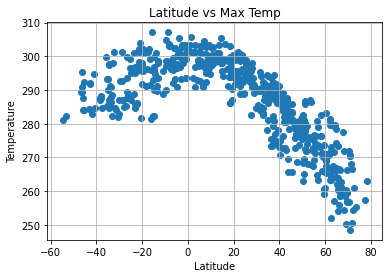

In [64]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp"], marker='o')
plt.title("Latitude vs Max Temp")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("LatitudevsTemperature.png")

plt.show()

## Latitude vs. Humidity Plot

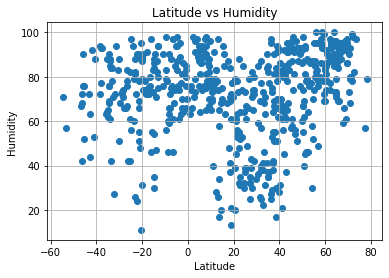

In [65]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker='o')
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatitudevsHumdity.png")
plt.show()

## Latitude vs. Cloudiness Plot

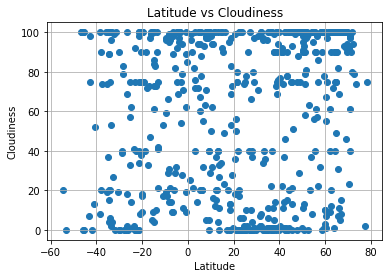

In [66]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker='o')
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatitudevsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

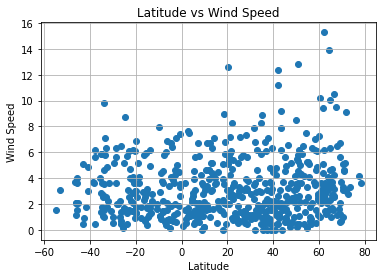

In [67]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker='o')
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatitudevsWindSpeed.png")
plt.show()

## Linear Regression

In [21]:
# define function to use to create linear regression plot
def plot_linear_regression(x_axis, y_axis, title, coordinates):
    
    # run regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plotting
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color='red')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [31]:
# create Northern and Southern hemisphere dataframe to use in linear regression plots
north_hemisphere = city_data.loc[(city_data["Latitude"] >= 0)]
south_hemisphere = city_data.loc[(city_data["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8109153284985945


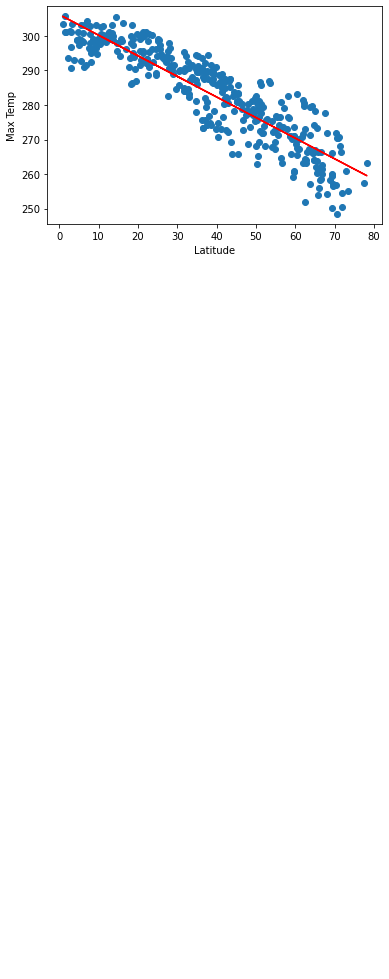

In [59]:
x_axis = north_hemisphere["Latitude"]
y_axis = north_hemisphere["Max Temp"]
plot_linear_regression(x_axis, y_axis, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.35682590439759093


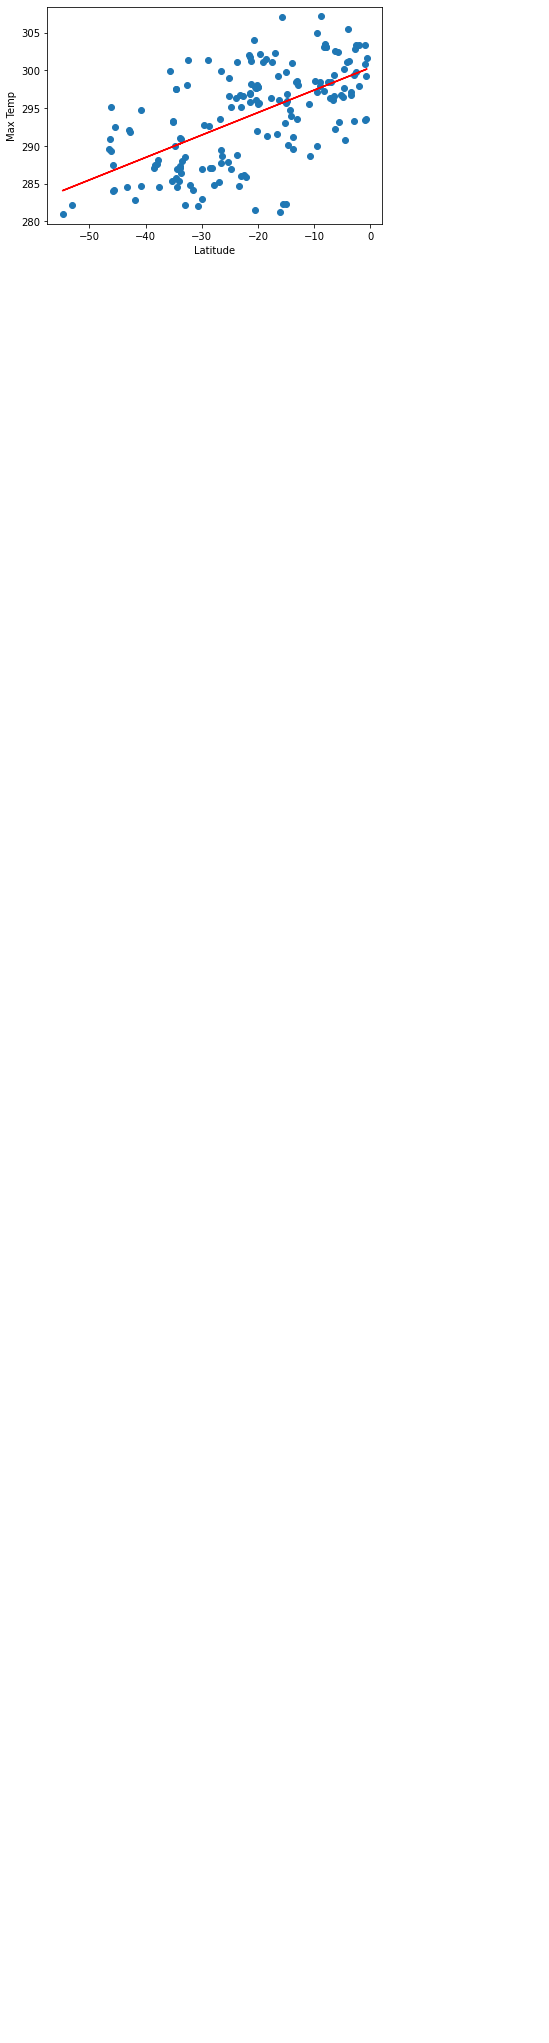

In [57]:
x_axis = south_hemisphere["Latitude"]
y_axis = south_hemisphere["Max Temp"]
plot_linear_regression(x_axis, y_axis, "Max Temp",(6,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06706932542802098


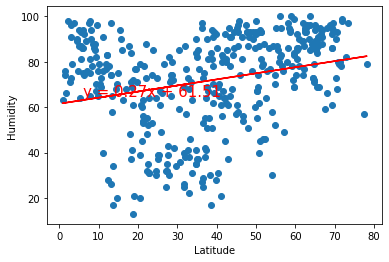

In [44]:
x_axis = north_hemisphere["Latitude"]
y_axis = north_hemisphere["Humidity"]
plot_linear_regression(x_axis, y_axis, 'Humidity',(6,65))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013975381497684404


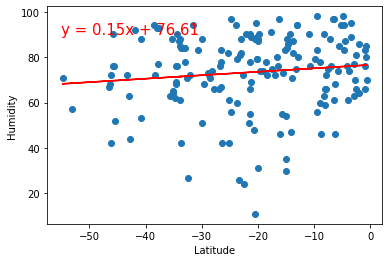

In [45]:
x_axis = south_hemisphere["Latitude"]
y_axis = south_hemisphere["Humidity"]
plot_linear_regression(x_axis, y_axis, 'Humidity',(-55,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.026635991067445578


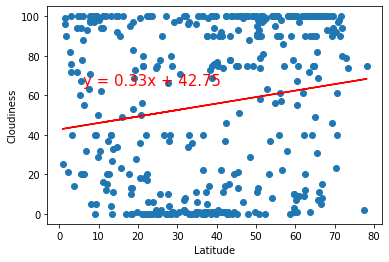

In [49]:
x_axis = north_hemisphere["Latitude"]
y_axis = north_hemisphere["Cloudiness"]
plot_linear_regression(x_axis, y_axis, 'Cloudiness',(6,65))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.017749569677638872


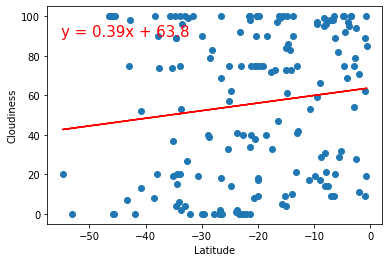

In [46]:
x_axis = south_hemisphere["Latitude"]
y_axis = south_hemisphere["Cloudiness"]
plot_linear_regression(x_axis, y_axis, 'Cloudiness',(-55,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017034764380739975


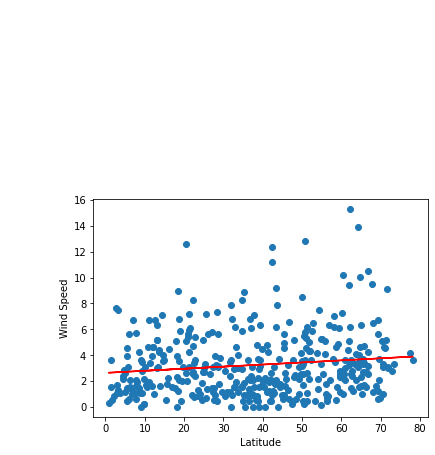

In [54]:
x_axis = north_hemisphere["Latitude"]
y_axis = north_hemisphere["Wind Speed"]
plot_linear_regression(x_axis, y_axis, 'Wind Speed',(-25,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0004532162067429857


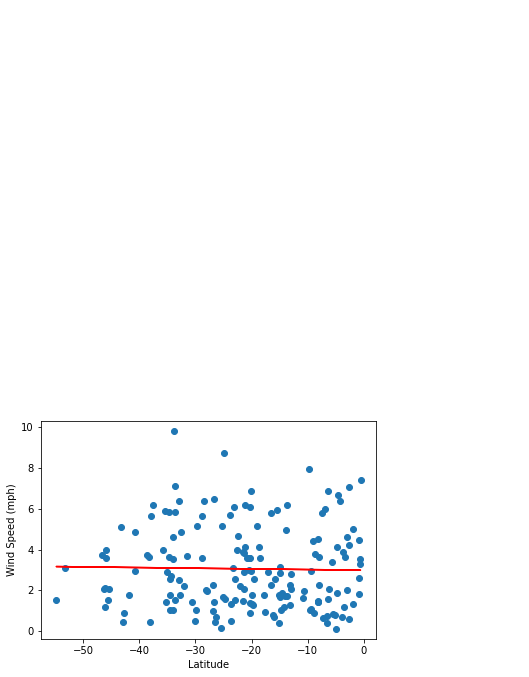

In [48]:
x_axis = south_hemisphere["Latitude"]
y_axis = south_hemisphere["Wind Speed"]
plot_linear_regression(x_axis, y_axis, 'Wind Speed (mph)',(6,30))

Include a written description of three observable trends based on the data.
1. Northern hemisphere has moderate to strong correlation between latitude and temperatures and humidity than Southern
2. Southern hemisphere has weak to no correlation in any of the types of weather.
3. Location does not affect the cloudiness and wind speed
